##Projet de machine learning : Mental Health and music

La problématique que l'on va essayer de résoudre est la corrélation entre la musique et la dépression afin de prédire "mental health" en fonction des paramètre Intensité, aspect dansant, émotion, sentiment. La variable cible à prédire est l'intensité de la santé psychologique (Low, médium est high)


Les données proviennent de la plateforme Kaggle source : Spotify

In [1]:
# Importations des librairies 

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Importation du dataset

dataset = pd.read_csv('https://raw.githubusercontent.com/Delphine-Jean/Delphine-Jean_portfolio/master/Portfolio%20Data%20Science/Music%20and%20mental%20health%20data/datasets_566879_1031115_master_song_data.csv')

In [3]:
# Observations de notre dataset

dataset.head()

,Participant_ID,Song_name,Artist,Spotify_ID,Loudness,Valence,Danceability,Acousticness,Instrumental,Audio_class,Lyrics,Sentiment_class,Audio + Lyrics analysis,Total_mental_health,Mental_health_severity_class
0,2,Here again,Elevation Worship,1wuqCUWHniGdEmOKZbQ1cg,-8.210,0.103,0.124,0.0128,0.000000,Sad,Can't go back to the beginning\n Can't control...,Positive,Sad,8,Low
1,2,The Stand,Hillsong United,0j2sui6BmkPy974W3VG3RZ,-8.128,0.133,0.449,0.1470,0.000000,Sad,You stood before creation\n Eternity in your h...,Positive,Sad,8,Low
2,2,Here I Bow,Brian Johnson,3RMcL7vuHuRzJQfMEuoJJP,-7.395,0.218,0.389,0.6780,0.000001,Sad,[Adolf Hitler:]\n Vader... This is your last c...,Positive,Sad,8,Low
3,3,On my way,Alan Walker,5csliehPVWFrDaWJvdSvbB,-5.952,0.295,0.616,0.0480,0.000119,Tense,Today I'm kinda feelin' like a ghost\n Call my...,Positive,"Exciting,Disturbing",15,Med
4,3,Bad guy,Billie Eilish,2Fxmhks0bxGSBdJ92vM42m,-10.965,0.562,0.701,0.3280,0.130000,Relax,"White shirt now red, my bloody nose\n Sleepin'...",Positive,Relax,15,Med


In [4]:
dataset.columns

Index(['Participant_ID', 'Song_name', 'Artist', 'Spotify_ID', 'Loudness',
       'Valence', 'Danceability', 'Acousticness', 'Instrumental',
       'Audio_class', 'Lyrics', 'Sentiment_class', 'Audio + Lyrics analysis',
       'Total_mental_health', 'Mental_health_severity_class'],
      dtype='object')

In [5]:
dataset.shape

#On observe un nombre peu significatif d'observations pour implémenter un modèle

(206, 15)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Participant_ID                206 non-null    int64  
 1   Song_name                     206 non-null    object 
 2   Artist                        206 non-null    object 
 3   Spotify_ID                    206 non-null    object 
 4   Loudness                      206 non-null    float64
 5   Valence                       206 non-null    float64
 6   Danceability                  206 non-null    float64
 7   Acousticness                  206 non-null    float64
 8   Instrumental                  206 non-null    float64
 9   Audio_class                   206 non-null    object 
 10  Lyrics                        206 non-null    object 
 11  Sentiment_class               206 non-null    object 
 12  Audio + Lyrics analysis       206 non-null    object 
 13  Total

In [7]:
# Supression des variables non pertinente pour notre analyse
from sklearn.preprocessing import LabelEncoder
exclude = ["Participant_ID","Song_name","Artist"]
for column in dataset.columns:
  if dataset[column].dtype == type(object) and column not in exclude:
    labelEncoder = LabelEncoder()
    dataset[column] = labelEncoder.fit_transform(dataset[column])

dataset.head()

,Participant_ID,Song_name,Artist,Spotify_ID,Loudness,Valence,Danceability,Acousticness,Instrumental,Audio_class,Lyrics,Sentiment_class,Audio + Lyrics analysis,Total_mental_health,Mental_health_severity_class
0,2,Here again,Elevation Worship,41,-8.210,0.103,0.124,0.0128,0.000000,2,26,1,3,8,1
1,2,The Stand,Hillsong United,17,-8.128,0.133,0.449,0.1470,0.000000,2,170,1,3,8,1
2,2,Here I Bow,Brian Johnson,78,-7.395,0.218,0.389,0.6780,0.000001,2,176,1,3,8,1
3,3,On my way,Alan Walker,136,-5.952,0.295,0.616,0.0480,0.000119,3,135,1,0,15,2
4,3,Bad guy,Billie Eilish,50,-10.965,0.562,0.701,0.3280,0.130000,1,158,1,2,15,2


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Participant_ID                206 non-null    int64  
 1   Song_name                     206 non-null    object 
 2   Artist                        206 non-null    object 
 3   Spotify_ID                    206 non-null    int64  
 4   Loudness                      206 non-null    float64
 5   Valence                       206 non-null    float64
 6   Danceability                  206 non-null    float64
 7   Acousticness                  206 non-null    float64
 8   Instrumental                  206 non-null    float64
 9   Audio_class                   206 non-null    int64  
 10  Lyrics                        206 non-null    int64  
 11  Sentiment_class               206 non-null    int64  
 12  Audio + Lyrics analysis       206 non-null    int64  
 13  Total

In [9]:
dataset = dataset.iloc[: , [0,1,2,4,5,6,7,9,11,12,13,14]]

dataset.head()

,Participant_ID,Song_name,Artist,Loudness,Valence,Danceability,Acousticness,Audio_class,Sentiment_class,Audio + Lyrics analysis,Total_mental_health,Mental_health_severity_class
0,2,Here again,Elevation Worship,-8.210,0.103,0.124,0.0128,2,1,3,8,1
1,2,The Stand,Hillsong United,-8.128,0.133,0.449,0.1470,2,1,3,8,1
2,2,Here I Bow,Brian Johnson,-7.395,0.218,0.389,0.6780,2,1,3,8,1
3,3,On my way,Alan Walker,-5.952,0.295,0.616,0.0480,3,1,0,15,2
4,3,Bad guy,Billie Eilish,-10.965,0.562,0.701,0.3280,1,1,2,15,2


In [15]:
#Normalisation 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
transformed = scaler.fit_transform(dataset[['Loudness', 'Valence', 'Danceability', 'Acousticness']])
for idx, col in enumerate(dataset.columns[4:-6]):
    dataset[col] = transformed[:,idx]
    
dataset.head()

,Participant_ID,Song_name,Artist,Loudness,Valence,Danceability,Acousticness,Audio_class,Sentiment_class,Audio + Lyrics analysis,Total_mental_health,Mental_health_severity_class
0,2,Here again,Elevation Worship,-8.210,-2.511326,-0.007215,0.0128,2,1,3,8,1
1,2,The Stand,Hillsong United,-8.128,-2.486243,0.017868,0.1470,2,1,3,8,1
2,2,Here I Bow,Brian Johnson,-7.395,-2.262029,0.242082,0.6780,2,1,3,8,1
3,3,On my way,Alan Walker,-5.952,-1.820635,0.683476,0.0480,3,1,0,15,2
4,3,Bad guy,Billie Eilish,-10.965,-3.354042,-0.849932,0.3280,1,1,2,15,2


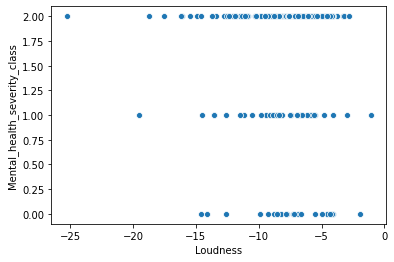

In [16]:
sns.scatterplot(x=dataset['Loudness'],y = dataset['Mental_health_severity_class'])

In [17]:
dataset_corr = dataset.corr()

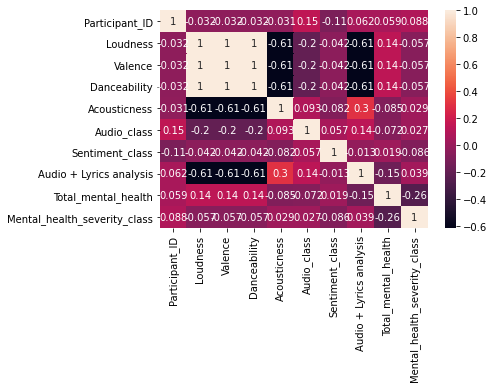

In [18]:
# Matrice de corrélation
sns.heatmap(data=dataset_corr,annot=True)